# Lab 1.4: Introduction to Linear Regression

Linear regression is an approach to modeling the relationship between a continuous dependent variable (**y**) and 
one or more independent variables (**x**). Here you will be introduced to fitting the model and interpreting the results before we dive more into the details of linear regression later in the course.

1. We will be using the `prestige` data in `statsmodels`. `statsmodels` is the de facto library for performing regression
   tasks in Python. Load the data with the follow code. **Remember to add a column of `1` to the x matrix for the 
   model to fit an intercept**.

   ```python 
   import statsmodels.api as sm
   prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
   y = prestige['prestige']
   X = prestige[['income', 'education']].astype(float)
   ```

2. Explore the data by making a [scatter_matrix](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-scatter-matrix)
   and a [boxplot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)
   to show the range of each of your variables.
   
3. The beta coefficients of a linear regression model can be calculated by solving the normal equation.
   Using numpy, write a function that solves the **normal equation** (below).
   As input your function should take a matrix of features (**x**) and
   a vector of target (**y**). You should return a vector of beta coefficients 
   that represent the line of best fit which minimizes the residual. 
   
    $$ \hat{\beta} = (X^TX)^{-1}X^Ty$$

4. Verify your results using statsmodels. Use the code below as a reference.
   ```python
   import statsmodels.api as sm
   model = sms.OLS(y, X).fit()
   summary = model.summary()
   ```

5. Interpret your result summary, focusing on the beta coefficents and the $R^2$. 


In [1]:
import statsmodels.api as sm
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
y = prestige['prestige']
X = prestige[['income', 'education']].astype(float)

In [2]:
# http://pandas.pydata.org/pandas-docs/stable/dsintro.html#column-selection-addition-deletion
X.insert(0, 'constant', 1)

In [83]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1209aee48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120b3c588>]], dtype=object)

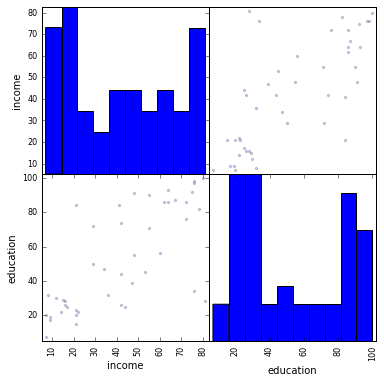

In [84]:
# http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-scatter-matrix
# from pandas.tools.plotting import scatter_matrix
pd.scatter_matrix(X, alpha=0.2, figsize=(6, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1212b6550>]], dtype=object)

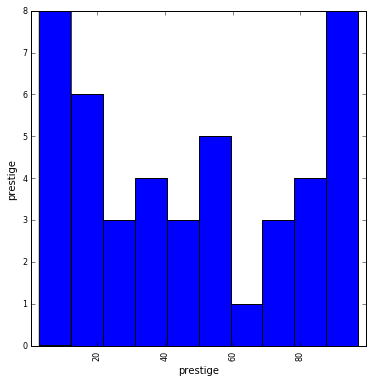

In [88]:
# NOTE: type(y) is Series, and needs to be converted to DataFrame using to_frame() method: y.to_frame()
pd.scatter_matrix(y.to_frame(), alpha=0.2, figsize=(6, 6))

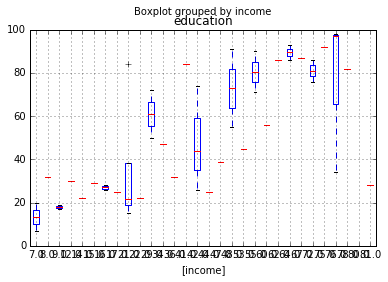

In [85]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html
X.boxplot(by=['income'])

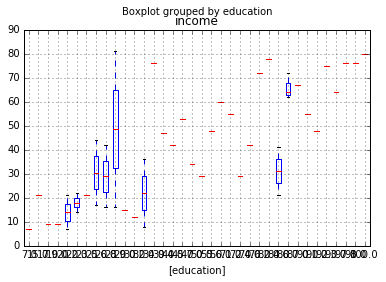

In [86]:
X.boxplot(by=['education'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x12164e7b8>],
 'caps': [<matplotlib.lines.Line2D at 0x121653b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x12165eac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12165ab70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12164e978>,
  <matplotlib.lines.Line2D at 0x1216539e8>]}

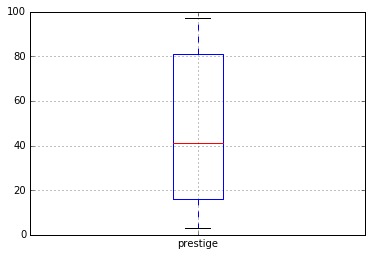

In [93]:
y.to_frame().boxplot()

In [67]:
import numpy as np

def beta_coefficients(features, target):
    
    # In our case, target is a Series object that needs to be converted to DataFrame first.
    
    target_frame = target.to_frame()
    
    features_matrix = np.asarray(features)
    target_matrix = np.asarray(target_frame)
    
    # http://stackoverflow.com/questions/29038615/linear-algebra-on-python
    # We can't use np.linalg.solve(features_matrix, target_matrix) as it will throw an error
    # because there's no exact solution, so we need to use np.linalg.lstsq() which is
    # "least-squares-fitting" to find a solution that minimizes the overall error.
    
    # http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
    # First element on result is slope, second intercept.
    a, b = np.linalg.lstsq(features_matrix, target_matrix)[0]
    return a, b
    

In [68]:
beta_coefficients(X, y)

(array([ 0.54827173]), array([ 0.49575132]))

In [96]:
import numpy as np

def beta_coefficients_alg(features, target):
    
    target_frame = target.to_frame()
    
    features_matrix = np.asarray(features)
    target_matrix = np.asarray(target_frame)
    
    step1 = np.dot(features_matrix.T, features_matrix)
    
    # http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html
    # to calculate inverse of a matrix.
    
    step2 = np.linalg.inv(step1)
    
    step3 = np.dot(step2, features_matrix.T)
    
    final = np.dot(step3, target_matrix)
    
    return final
    

In [97]:
beta_coefficients_alg(X, y)

array([[ 0.54827173],
       [ 0.49575132]])

In [14]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Wed, 31 Aug 2016   Prob (F-statistic):           8.65e-17
Time:                        15:34:41   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant      -6.0647      4.272     -1.420      0.163       -14.686     2.556
income         0.5987      0.120      5.003      0.000         0.357     0.840
education      0.5458      0.098      5.555      0.000         0.348     0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""